# Assignment 7: Gradient Descend Algorithm

In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
## Function to find out the next point in the path towards minima. The function following input
## The derivative function to be minimized, the intital x, rate of learning and the initial step to descend
def nextgradpoint(fdx,xnew,ratelearn,stepdescend):    
    
    xold=xnew
    xnew=xnew-ratelearn*fdx(xold)
    stepdescend=abs(xnew-xold)
        
    return xnew,stepdescend

In [3]:
# The function to localize minima of the given derivative of the function to be minimized
# Inputs are, the derivative function,max iterations, rate of learning,step initialization and the desired precision
# Intialize the step size for, conditional variable for terminating the descent
# The precision of the minima needed
# The rate of descent in a way how big of a step size you'll restrict yourself   
# The number of maximum iterations, another conditional variable for terminating the descend   
# fdx is the lambda anonymous function for the derivative of the function to be minimized
def gradientdescent(fdx,xinitial,itermax=10000,stepdescend=1,ratelearn=0.001,precision=0.0000001): 
    
    xnew=xinitial;xstepdescned=stepdescend          
    
    for i in range(itermax):      
    
        xnew,xstepdescend = nextgradpoint(fdx,xnew,ratelearn,stepdescend)  
        
        if i==itermax or xstepdescend<=precision:
            break
        
    return xnew

In [4]:
## Gradient Descend on a 2D function. The function is exactly the same as the function in 1D
## the only difference is that it takes two of these derivative functions now and minimize them simultaneously
## Implementation of the chain rule 
# fdx is the lambda anonymous function for the derivative of the function to be minimized
def gradientdescent2D(fdx,fdy,xinitial,yinitial,itermax=10000,stepdescend=1,ratelearn=0.001,precision=0.0000001): 
    
    # The number of maximum iterations, another conditional variable for terminating the descend
    xstepdescend=1   # Intialize the step size for, conditional variable for terminating the descent
    ystepdescend=1
    # The precision of the minima needed
    # The rate of descent in a way how big of a step size you'll restrict yourself
    xnew=xinitial
    ynew=yinitial
    
    for i in range(itermax):
        
        xnew,xstepdescend=nextgradpoint(fdx,xnew,ratelearn,xstepdescend)        
        ynew,ystepdescend=nextgradpoint(fdy,ynew,ratelearn,ystepdescend)
        
        stepdescend=max(xstepdescend,ystepdescend)
        if i==itermax or stepdescend<=precision:
            break
        
    return xnew, ynew

In [5]:
## Q1 : Find the Minima of, f(x)=x^2+3x+2

In [6]:
## 1D Functions to be minimized defined by the anonymous lambda function
fx = lambda x: x**2+3*x+2
# Derivative of the function f(x)
fdx = lambda x: 2*x+3
## Initialize the gradient starting point
xinitial=100.0 # Choose a random value for intializing x to allow further modification to it
xminima=gradientdescent(fdx,xinitial)

print("The global minima for the function [f(x)=x^2+3x+2]  is at x= "+str(xminima)[0:-14])
print("\nThe global minima for f(x)  is at --->  ("+str(xminima)[0:-14]+")")


The global minima for the function [f(x)=x^2+3x+2]  is at x= -1.49

The global minima for f(x)  is at --->  (-1.49)


In [7]:
#Plotting the minima

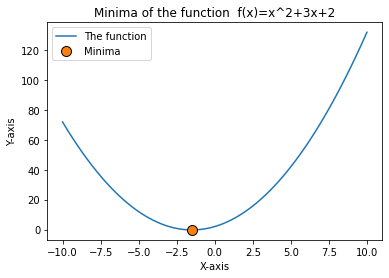

In [8]:
xaxis=numpy.linspace(-10,10,100)

fig=plt.figure()
ax=plt.gca()

ax.plot(xaxis,fx(xaxis),label='The function')
ax.plot(xminima,fx(xminima),'o',MarkerSize=10,MarkerEdgeColor='k',label='Minima')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Minima of the function  f(x)=x^2+3x+2')
ax.legend(handlelength=2)
plt.show()

In [9]:
## Q2 : Find the minima of, f(x,y)=x^2+y^2

In [10]:
## 2D function to be minimized defined by the lambda function
fx=lambda x,y: x**2+y**2
## The partial derivatives of f(x)
fdydx=lambda x:2*x
fdydw=lambda y:2*y
## intialize both x and y for the function to further modify them
xinitial=10
yinitial=10  
# Return the minima of the desired function f(x) 
xminima,yminima=gradientdescent2D(fdydx,fdydw,xinitial,yinitial)
print("The global minima for this function [f(x,y)=x^2+y^2] is x= "+str(xminima)[0:-17]+" and y= "+str(yminima)[0:-17] )
print("\nThe global minima of f(x,y) is at ---> ("+str(xminima)[0:-17]+","+str(yminima)[0:-17]+")")

The global minima for this function [f(x,y)=x^2+y^2] is x= 4.98 and y= 4.98

The global minima of f(x,y) is at ---> (4.98,4.98)


In [11]:
## Plotting the minimum

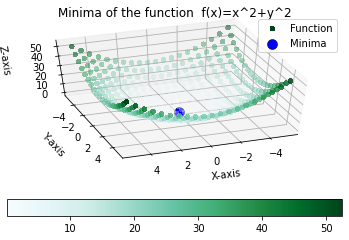

In [12]:

x = numpy.linspace(-5.12, 5.12, 20)
y = numpy.linspace(-5.12, 5.12, 20)
x1, x2 = numpy.meshgrid(x,y)
colormap1=cm.BuGn


fig = plt.figure()
ax = fig.gca(projection='3d')
xangle=50;yangle=70
ax.view_init(xangle,yangle)

im = ax.scatter3D(x1,x2,fx(x1,x2),c=fx(x1,x2), cmap=colormap1,linewidth=0, antialiased=False,label='Function')
fig.colorbar(im,orientation='horizontal')
ax.scatter3D(xminima,yminima,fx(xminima,yminima),c='b',s=100,linewidth=0.5,EdgeColor='k',label='Minima')

ax.set_xlabel('X-axis',labelpad=10)
ax.set_ylabel('Y-axis',labelpad=10)
ax.set_zlabel("Z-axis",labelpad=10)
ax.set_title('Minima of the function  f(x)=x^2+y^2',pad=10)
ax.legend(handlelength=2)
plt.show()
plt.show()
